LeetCode Stats (by Problems Solved):
kaidrix: 322 problems solved
sriswasthika: 38 problems solved
sandhyakumar1009: 170 problems solved
shahin04: 407 problems solved
muthu_visalakshi: 141 problems solved
hari10haran: 127 problems solved
deepakmadhukumar: 198 problems solved


LeetCode Stats (Top Performers by Problems Solved):
shahin04: 407 problems solved
kaidrix: 322 problems solved
deepakmadhukumar: 198 problems solved


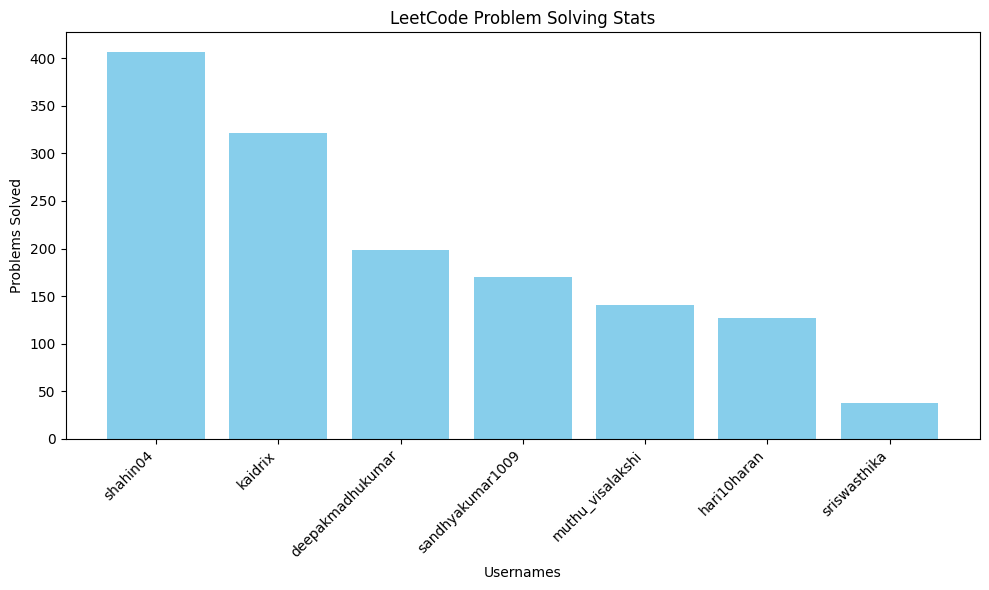

In [14]:
import requests
import matplotlib.pyplot as plt

def fetch_leetcode_stats(username):
    url = "https://leetcode.com/graphql/"
    query = """
    {
      matchedUser(username: "%s") {
        submitStats {
          acSubmissionNum {
            difficulty
            count
            submissions
          }
        }
      }
    }
    """ % username
    
    response = requests.post(url, json={"query": query})
    
    if response.status_code == 200:
        data = response.json()
        stats = data["data"]["matchedUser"]["submitStats"]["acSubmissionNum"]
        total_solved = sum(stat['count'] for stat in stats)
        return username, total_solved//2
    else:
        print(f"Failed to fetch data for {username}. Check the username or network connection.")
        return username, 0

# List of usernames to track
db = ["kaidrix", "sriswasthika", "sandhyakumar1009", "shahin04", "muthu_visalakshi", "hari10haran", "deepakmadhukumar"]

# Dictionary to store usernames and their solved problem counts
user_stats = {}

# Fetch stats for each user
for username in db:
    username, solved = fetch_leetcode_stats(username)
    user_stats[username] = solved

#Before Sorting
print("LeetCode Stats (by Problems Solved):")
for username, solved in user_stats.items():
    print(f"{username}: {solved} problems solved")

print()
print()


#TOP 3 Performers of the Class
# Sort the dictionary by the solved problems count in descending order
sorted_user_stats = dict(sorted(user_stats.items(), key=lambda item: item[1], reverse=True))

# Print the Top Performer stats
print("LeetCode Stats (Top Performers by Problems Solved):")
i=0
for username, solved in sorted_user_stats.items():
    print(f"{username}: {solved} problems solved")
    i+=1
    if i==3:
        break

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.bar(sorted_user_stats.keys(), sorted_user_stats.values(), color='skyblue')
plt.xlabel('Usernames')
plt.ylabel('Problems Solved')
plt.title('LeetCode Problem Solving Stats')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # To adjust the labels

# Show the graph
plt.show()
